# Stages in Image Processing

Image processing is a foundational domain in computer vision, enabling machines to interpret, analyze, and transform visual data into meaningful information. From enhancing medical scans to powering real-time object detection in self-driving cars, image processing plays a crucial role in modern artificial intelligence and data science.

This notebook presents a comprehensive exploration of the core pipeline stages in image processing using Python and popular open-source libraries such as OpenCV, scikit-image, and PyTorch.

## 1. Image Enhancement 
Image enhancement refers to the process of improving the visual appearance or perceptibility of an image for human viewers or for further automated processing. Enhancement modifies image attributes to make details more prominent. Common techniques include histogram equalization, which redistributes pixel intensities for better contrast; CLAHE (Contrast Limited Adaptive Histogram Equalization), which improves local contrast without over-amplifying noise; sharpening using convolutional kernels to enhance edges; and filtering techniques such as median or Gaussian filters for denoising. Each of these methods serves to emphasize certain features such as contrast, edges, or smoothness and is chosen based on the nature of the image and the desired outcome.

Histogram Equalization improves global contrast, while CLAHE prevents over-amplification of noise by applying local contrast enhancement.

### Importing Needed Libraries

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### i. Loading Image

In [100]:
img = cv2.imread('orange.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### ii. Histogram Equalization

In [101]:
heq = cv2.equalizeHist(img_gray)

### iii. CLAHE

In [102]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img_gray)

### iv. Sharpening

In [103]:
kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])
sharpened = cv2.filter2D(img_rgb, -1, kernel_sharp)

### v. Median Filtering

In [104]:
denoised = cv2.medianBlur(img_rgb, 5)

### vi. Plotting the Images

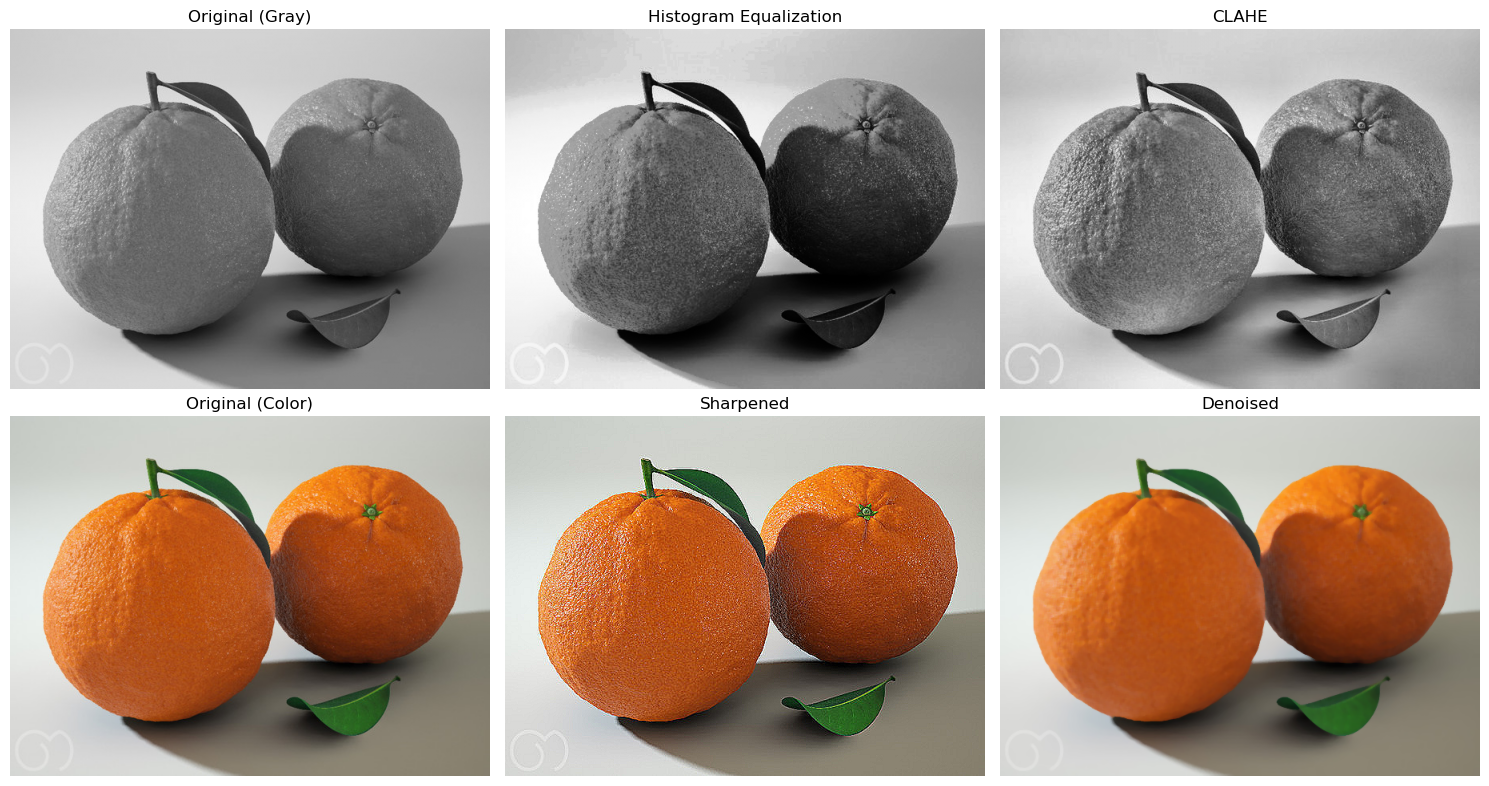

In [105]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs[0, 0].imshow(img_gray, cmap='gray'); axs[0, 0].set_title("Original (Gray)")
axs[0, 1].imshow(heq, cmap='gray'); axs[0, 1].set_title("Histogram Equalization")
axs[0, 2].imshow(clahe_img, cmap='gray'); axs[0, 2].set_title("CLAHE")
axs[1, 0].imshow(img_rgb); axs[1, 0].set_title("Original (Color)")
axs[1, 1].imshow(sharpened); axs[1, 1].set_title("Sharpened")
axs[1, 2].imshow(denoised); axs[1, 2].set_title("Denoised")
for ax in axs.ravel(): ax.axis('off')
plt.tight_layout(); plt.show()

## 2. Image Restoration
Image restoration aims to reconstruct or recover an original, uncorrupted image from a degraded version. The degradation may be due to noise, blurring, or loss of information in certain regions. A common simulation involves masking or corrupting a portion of the image and then restoring it using mathematical models. Techniques such as inpainting (e.g., Telea or Navier-Stokes methods) work by interpolating missing data using surrounding pixel information. Restoration quality is evaluated using quantitative metrics like PSNR (Peak Signal-to-Noise Ratio) and SSIM (Structural Similarity Index), which measure fidelity and perceptual similarity. Restoration is particularly important in fields such as satellite imaging, historical photo recovery, and medical image correction.

### Importing Needed Libraries

In [106]:
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

### i. Simulating corruption (drawing white box)

In [107]:
corrupted = img_rgb.copy()
mask = np.zeros(corrupted.shape[:2], dtype=np.uint8)
mask[100:150, 100:150] = 255  
corrupted[100:150, 100:150] = 255

### ii. Inpainting

In [108]:
restored_telea = cv2.inpaint(cv2.cvtColor(corrupted, cv2.COLOR_RGB2BGR), mask, 3, cv2.INPAINT_TELEA)
restored_ns = cv2.inpaint(cv2.cvtColor(corrupted, cv2.COLOR_RGB2BGR), mask, 3, cv2.INPAINT_NS)

### iii. Converting back to RGB

In [109]:
restored_telea = cv2.cvtColor(restored_telea, cv2.COLOR_BGR2RGB)
restored_ns = cv2.cvtColor(restored_ns, cv2.COLOR_BGR2RGB)

### iv. Evaluating

In [110]:
psnr_telea = psnr(img_rgb, restored_telea)
psnr_ns = psnr(img_rgb, restored_ns)
ssim_telea = ssim(img_rgb, restored_telea, channel_axis=-1)
ssim_ns = ssim(img_rgb, restored_ns, channel_axis=-1)

### v. Plotting the Images

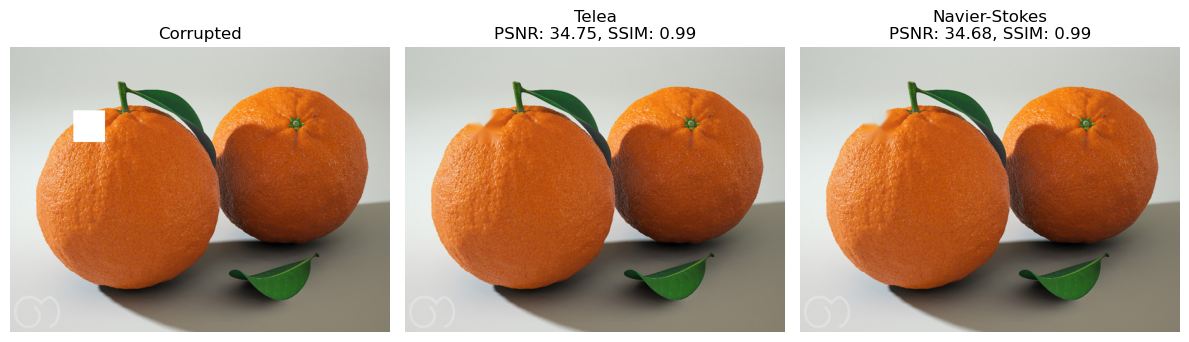

In [111]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(corrupted); plt.title("Corrupted"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(restored_telea); plt.title(f"Telea\nPSNR: {psnr_telea:.2f}, SSIM: {ssim_telea:.2f}"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(restored_ns); plt.title(f"Navier-Stokes\nPSNR: {psnr_ns:.2f}, SSIM: {ssim_ns:.2f}"); plt.axis('off')
plt.tight_layout(); plt.show()

## 3. Morphological Operations
Morphological operations are a set of image processing techniques that focus on the shape or structure of features within a binary or grayscale image. Based on set theory and mathematical morphology, the primary operations are dilation, erosion, opening, and closing. Opening is useful for removing small objects or noise while preserving the main structure, while closing is used to fill small holes or gaps. These operations require a kernel (or structuring element), which defines how the pixels in the neighborhood affect the transformation. Its applications range from text segmentation to biomedical image analysis, where shape plays a crucial role in understanding content.

### i. Converting to binary using threshold

In [112]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

### ii. Structuring element

In [113]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

### iii. Plotting the Images

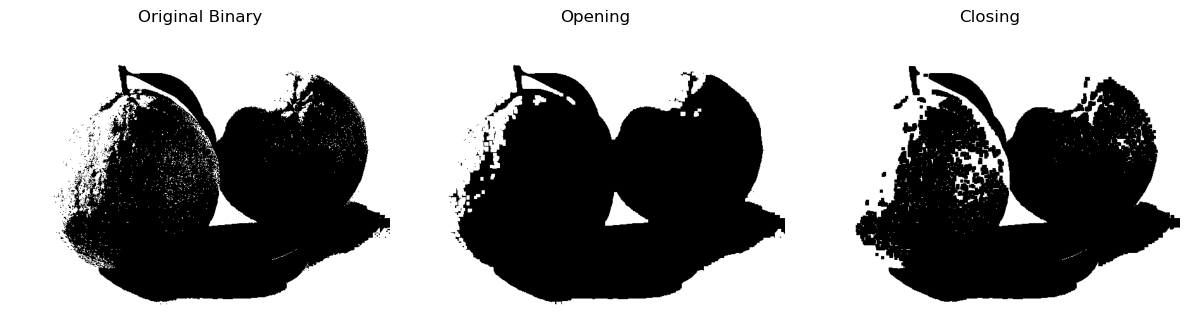

In [114]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
titles = ['Original Binary', 'Opening', 'Closing']
for i, img in enumerate([binary, opening, closing]):
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(titles[i])
    ax[i].axis('off')
plt.tight_layout(); plt.show()

## 4. Segmentation
Image segmentation is the process of partitioning an image into meaningful regions, typically corresponding to objects or areas of interest. It is a critical step in high-level image analysis and computer vision tasks. Semantic segmentation assigns a class label to every pixel in an image, treating identical objects as the same region (e.g., all pixels belonging to "car"). In contrast, instance segmentation detects individual objects of the same class separately (e.g., two different cars). Pre-trained deep learning models like DeepLabV3 (semantic) or Mask R-CNN (instance) leverage convolutional neural networks to provide robust segmentation across a wide variety of scenes. These techniques are widely used in autonomous driving, medical imaging, and scene understanding.



### Importing Needed Libraries

In [115]:
import torch
import torchvision.transforms as T
from torchvision import models
from PIL import Image
from ultralytics import YOLO

### i. Loading  image

In [116]:
img = Image.open("apple.jpg").convert("RGB")
transform = T.Compose([
    T.Resize((520, 520)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])
input_tensor = transform(img).unsqueeze(0)

### ii. Loading pretrained FCN

In [117]:
model = models.segmentation.fcn_resnet101(pretrained=True).eval()

c:\Users\Pankaj\micromamba\envs\ml_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Pankaj\micromamba\envs\ml_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### iii. Inference

In [118]:
with torch.no_grad():
    output = model(input_tensor)['out'][0]
pred = output.argmax(0).byte().cpu().numpy()

### iv. Applying color map and plotting images

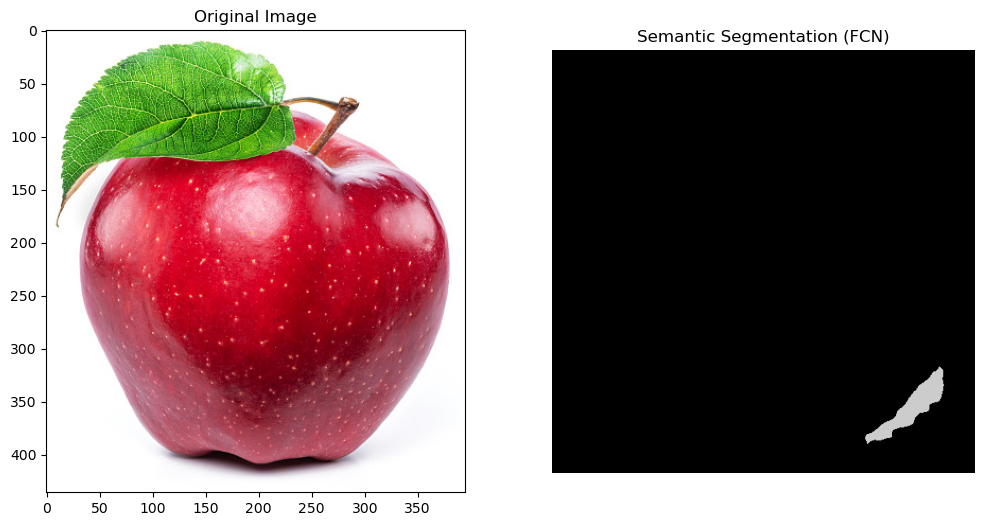

In [119]:
colormap = plt.get_cmap('nipy_spectral')
seg_rgb = colormap(segmentation / segmentation.max())[:, :, :3]  

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original Image")
plt.subplot(1,2,2); plt.imshow(seg_rgb); plt.title("Semantic Segmentation (FCN)")
plt.axis('off')
plt.show()

### Instance Segmentation using YOLO


image 1/1 c:\Users\Pankaj\Downloads\IMG\apple.jpg: 640x608 1 apple, 239.8ms
Speed: 7.5ms preprocess, 239.8ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 608)


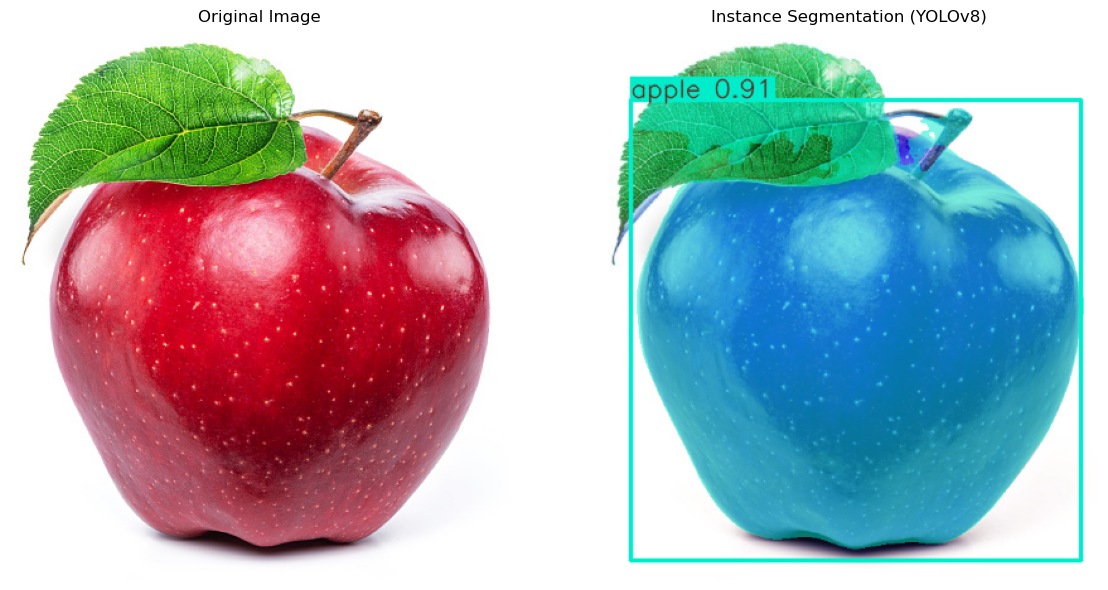

In [120]:

model = YOLO("yolov8n-seg.pt")

results = model("apple.jpg")  

original = cv2.imread("apple.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

segmented = results[0].plot()  


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented)
plt.title("Instance Segmentation (YOLOv8)")
plt.axis("off")

plt.tight_layout()
plt.show()

## 5. Image Recognition (Object Detection)
Object detection is the task of identifying and localizing objects within an image. Unlike classification, which only predicts a label, detection returns bounding boxes and class labels for multiple objects. State-of-the-art models like YOLO (You Only Look Once), SSD (Single Shot Multibox Detector), and Faster R-CNN use deep learning to detect objects efficiently in real-time. YOLOv8, for instance, processes the entire image in one pass and predicts bounding boxes and confidence scores for each object. Object detection has significant applications in surveillance, robotics, and augmented reality, where understanding the spatial arrangement of objects is crucial.

In [121]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  
results = model("apple.jpg", show=False)

results[0].show()  



image 1/1 c:\Users\Pankaj\Downloads\IMG\apple.jpg: 640x608 1 apple, 211.3ms
Speed: 7.0ms preprocess, 211.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 608)


## 6. Image Representation & Description
Image representation and description are two fundamental concepts in computer vision. Representation refers to the extraction of low-level features such as edges, corners, or blobs that indicate where key structures exist in an image. Techniques like SIFT (Scale-Invariant Feature Transform) and ORB (Oriented FAST and Rotated BRIEF) are commonly used for keypoint detection. Description, on the other hand, involves capturing numerical values that describe these features in a way that enables matching, comparison, or classification. Descriptors like SIFT vectors or binary ORB signatures enable robust object recognition, image matching, and structure-from-motion in variable conditions such as scale, rotation, and illumination.

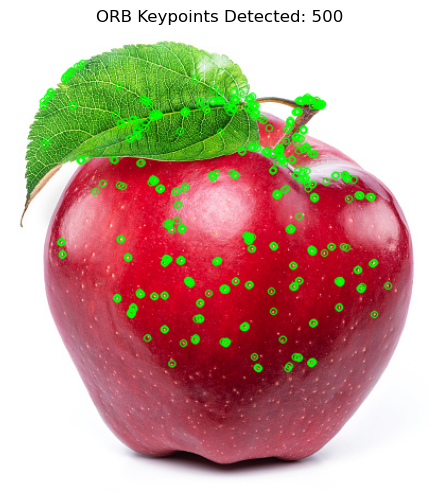

ORB Descriptor array shape: (500, 32)
First 5 ORB descriptors:
 [[106  59 145  69 232  13  20 190  43  46  56 237 174  39 133 146 134  87 228  68 192  88 211  41  38 220 116 178  66 240  14 153]
 [ 11 191  99 137 246 167 239 243 101  72  90 231  25 236 182  36 126  43  23 237 215 184  36 253 100  28 170 192 111 207 241 213]
 [220  97  15  38   2  67  79 124  48 166 195 137 119 131  17 152  56 197 125 231 104 215 137  42 144 167 249  32  97 179  38 104]
 [255 111 124  86  74  22  95 248  49 132 181 141 107  79 159  23  62 253 213 238 232 199 254 109 115 249  69 184 103 183 106 241]
 [ 26 253 122 117 115 218 189 246 185 108 126 161  44 159 135 180 166 127 247 193 196 153 160 238 127 125  30 131  70  20  47 255]]


In [125]:
img = cv2.imread("apple.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=500) 

keypoints, descriptors = orb.detectAndCompute(gray, None)

img_with_kp = cv2.drawKeypoints(img_rgb, keypoints, None, color=(0,255,0), flags=0)

plt.figure(figsize=(10, 6))
plt.imshow(img_with_kp)
plt.title(f"ORB Keypoints Detected: {len(keypoints)}")
plt.axis("off")
plt.show()

print("ORB Descriptor array shape:", descriptors.shape)
print("First 5 ORB descriptors:\n", descriptors[:5])

## 7. Image Compression
Image compression reduces the size of image files while retaining as much visual information as possible. This is crucial for storage efficiency and transmission over networks. Compression can be lossy (where some information is permanently discarded) or lossless. Two algorithmic approaches are demonstrated here: PCA-based compression and K-means color quantization. PCA (Principal Component Analysis) reduces dimensionality by identifying and preserving the most significant patterns in pixel intensity. K-means clustering reduces color diversity by replacing similar colors with representative cluster centers. These methods are inspired by statistical and machine learning principles and offer useful alternatives to traditional JPEG-based compression.

### Importing Needed Libraries

In [126]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### i. Loading image

In [127]:
img = cv2.imread("apple.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized = cv2.resize(img_rgb, (128, 128))
reshaped = resized.reshape(-1, 3)

### ii. K-Means Compression (Color Quantization)

In [131]:
k = 16  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(reshaped)
compressed_kmeans = kmeans.cluster_centers_[kmeans.labels_]
compressed_kmeans = compressed_kmeans.reshape(resized.shape).astype(np.uint8)

### iii. PCA Compression (Grayscale approximation)

In [130]:
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
pca = PCA(n_components=0.95)  
pca_data = pca.fit_transform(gray)
pca_restored = pca.inverse_transform(pca_data).astype(np.uint8)

### iv. Output

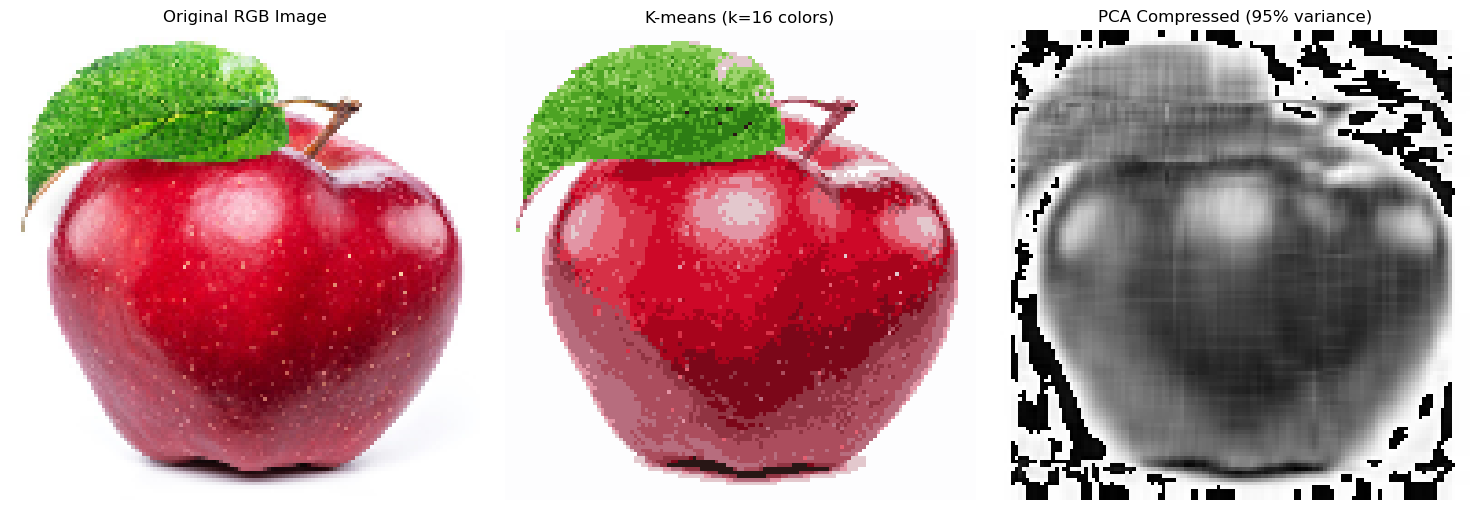

Original RGB image shape: (128, 128, 3) => Size: 49152 bytes
K-means compressed image shape: (128, 128, 3) => Size: 49152 bytes
PCA restored image shape: (128, 128) => Size: 16384 bytes


In [133]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(resized)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(compressed_kmeans)
plt.title(f"K-means (k={k} colors)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pca_restored, cmap='gray')
plt.title(f"PCA Compressed (95% variance)")
plt.axis('off')

plt.tight_layout()
plt.show()


print("Original RGB image shape:", resized.shape, "=> Size:", resized.nbytes, "bytes")
print("K-means compressed image shape:", compressed_kmeans.shape, "=> Size:", compressed_kmeans.nbytes, "bytes")
print("PCA restored image shape:", pca_restored.shape, "=> Size:", pca_restored.nbytes, "bytes")

## 8. Color Image Processing
Color image processing involves manipulating and analyzing images composed of multiple color channels, typically Red, Green, and Blue (RGB). Each channel carries different information, and parsing them separately allows for more nuanced processing. The histogram of each channel provides insight into the distribution of intensity values, which directly affects contrast. Standard deviation is used to quantify this contrast; higher values indicate greater variation and often richer visual information. Thresholding, particularly OTSU’s method aims to automatically segment an image into foreground and background based on intensity histograms. Evaluating thresholding effectiveness can be done visually and via entropy, where lower entropy often indicates cleaner, more decisive segmentation. However, in low-contrast or unimodal cases, entropy alone may not reflect thresholding quality correctly, necessitating qualitative analysis.

### Importing Needed Libraries

In [134]:
from skimage.filters import threshold_otsu
from scipy.stats import entropy

### i. Channel Parsing

In [135]:
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
channels = [R, G, B]
names = ['Red', 'Green', 'Blue']

### ii. Computing standard deviation (contrast estimate)

In [136]:
print("Standard Deviation (Contrast) per channel:")
for name, c in zip(names, channels):
    print(f"{name} channel std: {np.std(c):.2f}")

Standard Deviation (Contrast) per channel:
Red channel std: 59.90
Green channel std: 99.67
Blue channel std: 95.50


### iii. Apply OTSU thresholding and entropy calculation

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_14980\2130285969.py:8: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist_counts = np.histogram(binary, bins=2)[0]


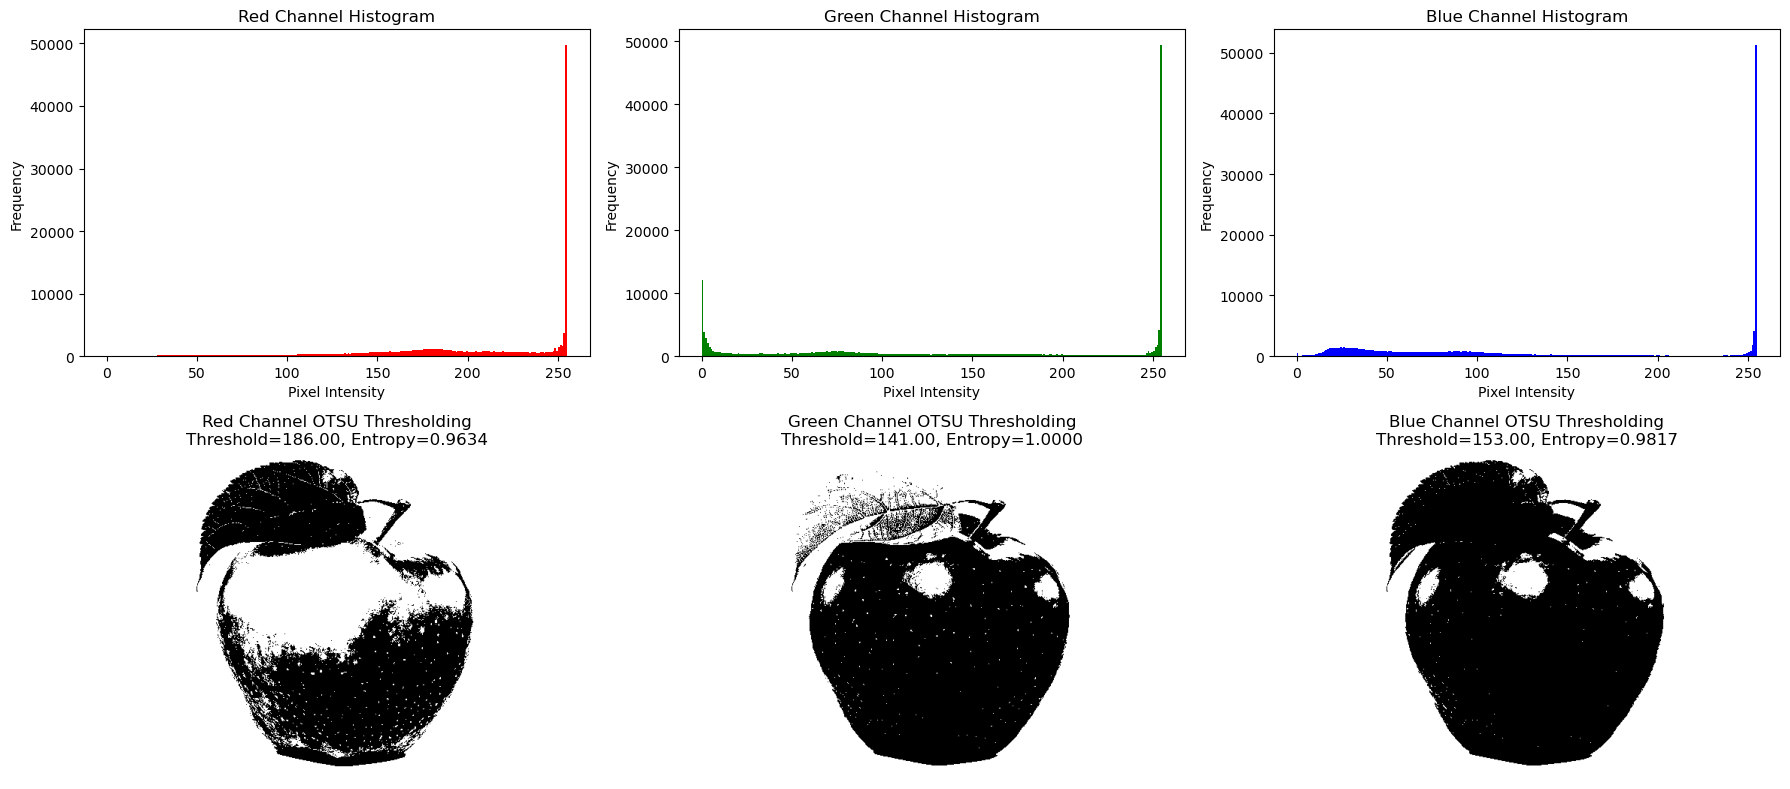

In [139]:

plt.figure(figsize=(18, 8))

for i, (channel, name) in enumerate(zip(channels, names)):

    thresh = threshold_otsu(channel)
    binary = channel > thresh
    
    hist_counts = np.histogram(binary, bins=2)[0]
    ent = entropy(hist_counts, base=2)
    
    plt.subplot(2, 3, i+1)
    plt.hist(channel.ravel(), bins=256, color=name.lower())
    plt.title(f'{name} Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, i+4)
    plt.imshow(binary, cmap='gray')
    plt.title(f'{name} Channel OTSU Thresholding\nThreshold={thresh:.2f}, Entropy={ent:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()
